In [4]:
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

data = pd.read_csv('perf_forward.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'impl', 'context_length', 'time_taken_ms',
       'memory_used_mb'],
      dtype='object')

<Axes: xlabel='context_length', ylabel='time_taken_ms'>

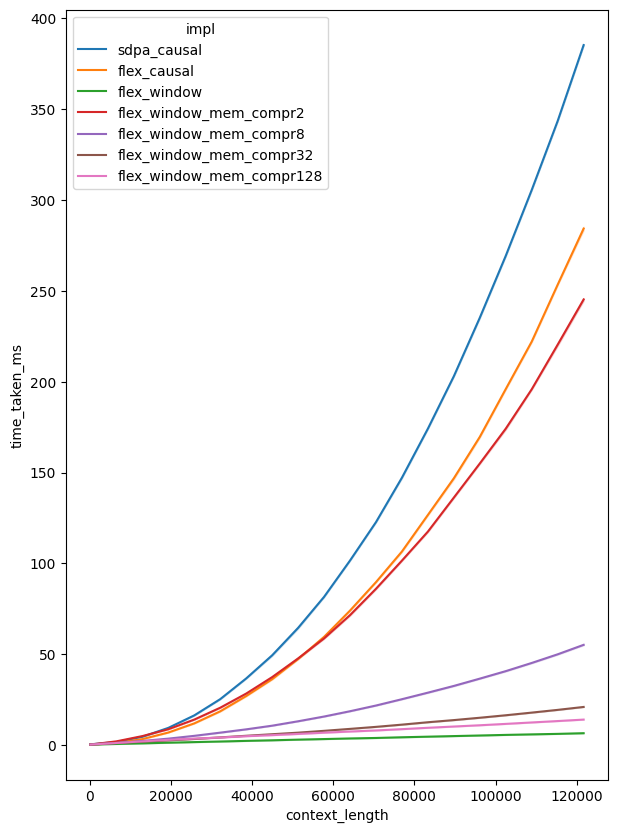

In [10]:
plt.figure(figsize=(7,10))
sns.lineplot(data, x='context_length', y='time_taken_ms', hue='impl')

<Axes: xlabel='context_length', ylabel='memory_used_mb'>

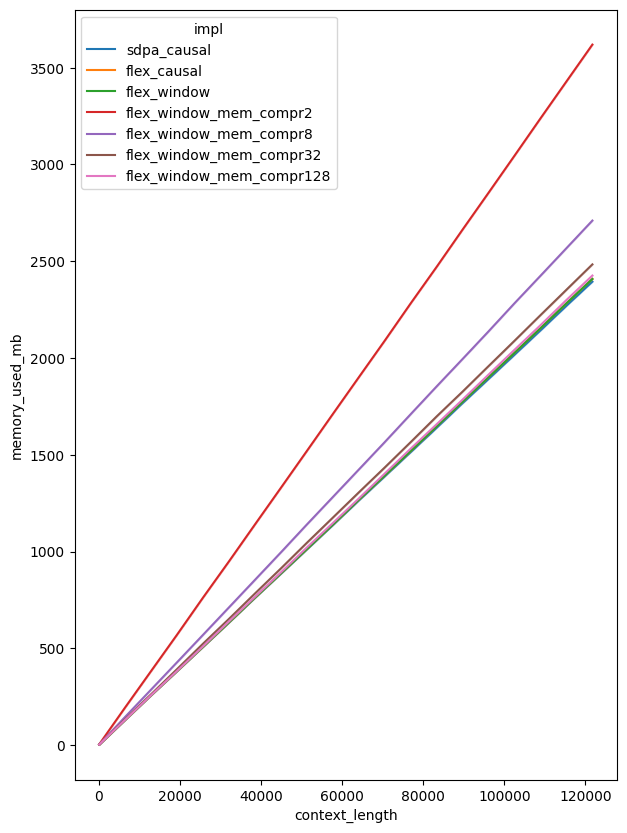

In [12]:
plt.figure(figsize=(7,10))
sns.lineplot(data, x='context_length', y='memory_used_mb', hue='impl')